In [21]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Dataset'))
sys.path.append(os.path.abspath('..'))

import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost_
importlib.reload(xgboost_)
from xgboost_ import xg,parameter_searching,barrido_parametrico

In [22]:
# pruebas_train = pd.read_csv('../Dataset/Procesado/pruebas.csv')
# pruebas_val = pd.read_csv('../Dataset/Procesado/pruebas_val.csv')

# X_train_prueba = pruebas_train.drop(columns=['precio_pesos_constantes'])
# y_train_prueba = pruebas_train['precio_pesos_constantes']

# X_val_prueba = pruebas_val.drop(columns=['precio_pesos_constantes'])
# y_val_prueba =pruebas_val['precio_pesos_constantes']


In [31]:
df_train = pd.read_csv('../Dataset/Procesado/train_procesado_lim.csv')
df_validation = pd.read_csv('../Dataset/Procesado/val_procesado_lim.csv')

df_train = df_train[(df_train['STotalM2'] > 10) & (df_train['STotalM2'] < 500)]
df_train = df_train[(df_train['SConstrM2'] > 10) & (df_train['SConstrM2'] < 500)]
df_train = df_train[(df_train['precio_pesos_constantes'] > 0) & (df_train['precio_pesos_constantes'] < 6000000)]

df_validation = df_validation[(df_validation['STotalM2'] > 10) & (df_validation['STotalM2'] < 500)]
df_validation = df_validation[(df_validation['SConstrM2'] > 10) & (df_validation['SConstrM2'] < 500)]
df_validation = df_validation[(df_validation['precio_pesos_constantes'] > 0) & (df_validation['precio_pesos_constantes'] < 6000000)]



X_train = df_train.drop(columns=['precio_pesos_constantes'])
y_train = df_train['precio_pesos_constantes']

X_val = df_validation.drop(columns=['precio_pesos_constantes'])
y_val =df_validation['precio_pesos_constantes']

In [32]:
print("Precio maximo: ", y_train.max())

Precio maximo:  5984094.01769173


In [33]:

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_val)

print("R2 Score:", r2_score(y_val, y_pred))
print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))

# # Métricas
# print("R2 Score:", r2_score(y_X_val_procesado = pruebas_val.drop(columns=['precio_pesos_constantes'])
# y_val_procesado =pruebas_val['precio_pesos_constantes']val, y_pred))
# print("RMSE:", mean_squared_error(y_val, y_pred, squared=False))


R2 Score: 0.0062584408682095916
RMSE: 329721.2611923407


/usr/lib/python3/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
xg_,y_pred = xg(X_train, y_train, X_val, y_val)

Mean Squared Error: 59236836105.25313
R2 score: 0.45853373686086296


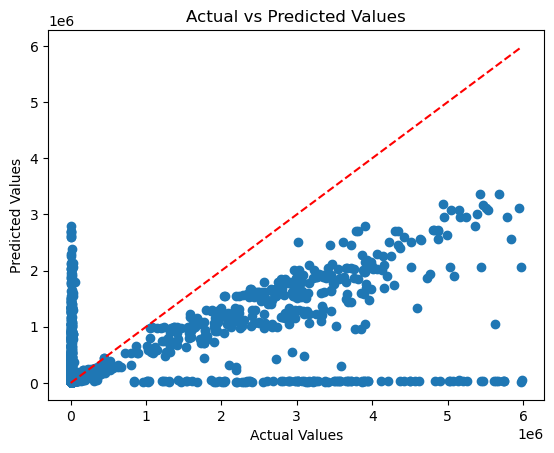

In [35]:
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [17]:
print("Max y min de STotalM2", X_train['STotalM2'].max(), X_train['STotalM2'].min())
print("Columnas de X_train", X_train.columns)
print("Columnas de X_val", X_val.columns)

Max y min de STotalM2 495.0 12.0
Columnas de X_train Index(['STotalM2', 'SConstrM2', 'Dormitorios', 'Banos', 'Ambientes',
       'Amoblado', 'Antiguedad', 'Cisterna', 'Gimnasio', 'Laundry',
       'Calefaccion', 'AireAC', 'Jacuzzi', 'SalonFiestas', 'Cocheras',
       'LONGITUDE', 'LATITUDE', 'ITE_TIPO_PROD_encoded'],
      dtype='object')
Columnas de X_val Index(['STotalM2', 'SConstrM2', 'Dormitorios', 'Banos', 'Ambientes',
       'Amoblado', 'Antiguedad', 'Cisterna', 'Gimnasio', 'Laundry',
       'Calefaccion', 'AireAC', 'Jacuzzi', 'SalonFiestas', 'Cocheras',
       'LONGITUDE', 'LATITUDE', 'ITE_TIPO_PROD_encoded'],
      dtype='object')


In [18]:
# modelos = barrido_parametrico(X_train, X_val,y_train, y_val)
# X_train = X_train.drop(columns=['ITE_ADD_STATE_NAME_encoded', 'ITE_ADD_NEIGHBORHOOD_NAME_encoded'])
# X_val = X_val.drop(columns=['ITE_ADD_STATE_NAME_encoded', 'ITE_ADD_NEIGHBORHOOD_NAME_encoded'])
# print(X_train.columns())
# muestras_filtradas = df_train[df_train['STotalM2'] > 400]

train_procesado = df_train[(df_train['STotalM2'] > 10) & (df_train['STotalM2'] < 10**3)]
val_procesado = df_train[(df_train['STotalM2'] > 10) & (df_train['STotalM2'] < 10**3)]
print(len(train_procesado.columns))
print(len(X_train.columns))
print("Max y min de STotalM2", train_procesado['STotalM2'].max(), val_procesado['STotalM2'].min())

X_train_procesado = train_procesado.drop(columns=['precio_pesos_constantes'])
y_train_procesado = train_procesado['precio_pesos_constantes']
X_val_procesado = val_procesado.drop(columns=['precio_pesos_constantes'])
y_val_procesado =val_procesado['precio_pesos_constantes']


num_cols = ['Dormitorios', 'Banos', 'Ambientes', 'Cocheras','Amoblado','Antiguedad','ITE_TIPO_PROD_encoded','Laundry','Calefaccion','Jacuzzi','Gimnasio','Cisterna','AireAC','SalonFiestas']
imp_cols = ['STotalM2', 'SConstrM2', 'LONGITUDE', 'LATITUDE']
X_train_procesado = X_train_procesado[num_cols + imp_cols]
X_val_procesado = X_val_procesado[num_cols + imp_cols]
print(len(X_train_procesado.columns))
# modelos = barrido_parametrico(cambio_X_train, X_val,y_train, y_val) 
xg_ = xg(X_train_procesado, y_train_procesado, X_val_procesado, y_val_procesado)

# decision_tree = parameter_searching(X_train, y_train, X_val, y_val,xg_)

19
18
Max y min de STotalM2 495.0 12.0
18
Mean Squared Error: 132725469460.01917
R2 score: 0.6806823822294652


In [19]:
binarias = ['Laundry', 'Calefaccion', 'Jacuzzi', 'Gimnasio', 'Cisterna', 'AireAC', 'SalonFiestas', 'Amoblado','ITE_TIPO_PROD_encoded']
categoricas = ['ITE_TIPO_PROD']

x_train_change = X_train.drop(columns=binarias)
x_val_change = X_val.drop(columns=binarias)
model, pred = xg(x_train_change,y_train,x_val_change,y_val)

Mean Squared Error: 241284075884.15958
R2 score: 0.48056197821769686


In [20]:
print(x_train_change.head)

<bound method NDFrame.head of         STotalM2  SConstrM2  Dormitorios  Banos  Ambientes  Antiguedad  \
0           57.0       53.0            1      1          2          25   
1          145.0      145.0            3      2          5          35   
2           38.0       38.0            1      1          2          30   
3           32.0       32.0            1      1          2          50   
4           45.0       45.0            1      1          2          40   
...          ...        ...          ...    ...        ...         ...   
166858     235.0      235.0            3      3          7          70   
166859      37.0       35.0            1      1          2           2   
166860      35.0       35.0            1      1          2          25   
166861      92.0       80.0            2      2          3          40   
166862      64.0       64.0            2      1          3           0   

        Cocheras  LONGITUDE   LATITUDE  
0              0 -58.406820 -34.592224  